# Milestone 1 

# 1 - Perkenalan

Nama: `Bandoro, FTDS 013`


Objective: 
```
1. Mampu memperoleh data menggunakan BigQuery
2. Mampu memahami konsep supervised learning
3. Mampu mempersiapkan data untuk digunakan dalam model supervised learning
4. Mampu mengimplementasikan supervised learning dengan data yang diberikan
5. Mampu melakukan evaluasi model
6. Mampu melakukan model tuning
```

Problem: 
`Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.`

Conceptual problems: 
```
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
```

Proses query:

*** 

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

FROM `bigquery-public-data.ml_datasets.credit_card_default`

LIMIT 25974;

***

Note: database hanya memiliki jumlah data sebanyak 2965 sehingga data yang diquery hanya berisi kolom dengan jumlah tersebut

# 2 - Import Libraries

In [1]:
# Berikut ini adalah library yang akan saya gunakan 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# 3 - Data Loading

In [2]:
# karena jumlah kolom dataset lebih banyak dari default awal yang ditampilkan, maka saya akan melakukan setting 'display.max.columns'

pd.set_option('display.max.columns', None)

In [3]:
# loading data dan menampilkan data 

data = pd.read_csv('h8dsft_P1M1_Bandoro.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


Dataset yang saya gunakan terdiri dari 2965 baris dan 24 kolom terkait billing dan payment credit card periode April-September 2005. Tiap baris mewakili informasi tiap-tiap nasabah credit card, berikut deskripsi informasi yang diwakili oleh tiap kolom:

* limit_balance : Amount of given credit in NT dollars (includes individual and family/supplementary credit
* sex : Gender (1=male, 2=female)
* education_level : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* marital_status : Marital status (1=married, 2=single, 3=others)	
* age : Age in years
* pay_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* pay_2 : Repayment status in August, 2005 (scale same as above)
* pay_3 : Repayment status in July, 2005 (scale same as above)
* pay_4 : Repayment status in June, 2005 (scale same as above)	
* pay_5 : Repayment status in May, 2005 (scale same as above)
* pay_6 : Repayment status in April, 2005 (scale same as above)
* bill_amt_1 : Amount of bill statement in September, 2005 (NT dollar)
* bill_amt_2 : Amount of bill statement in August, 2005 (NT dollar)
* bill_amt_3 : Amount of bill statement in July, 2005 (NT dollar)
* bill_amt_4 : Amount of bill statement in June, 2005 (NT dollar)
* bill_amt_5 : Amount of bill statement in May, 2005 (NT dollar) 	
* bill_amt_6 : Amount of bill statement in April, 2005 (NT dollar)	
* pay_amt_1 : Amount of previous payment in September, 2005 (NT dollar)
* pay_amt_2 : Amount of previous payment in August, 2005 (NT dollar)	
* pay_amt_3 : Amount of previous payment in July, 2005 (NT dollar)	
* pay_amt_4 : Amount of previous payment in June, 2005 (NT dollar)	
* pay_amt_5 : Amount of previous payment in May, 2005 (NT dollar)	
* pay_amt_6 : Amount of previous payment in April, 2005 (NT dollar)	
* default_payment_next_month : Default payment (1=yes, 0=no)


In [4]:
# membuat data_copy sebagai backup

data_copy = data.copy()

In [5]:
# merename kolom pay_0 menjadi pay_1 agar memiliki urutan yang serasi dengan kategori lainnya (bill_amt_1 dan pay_amt_1 sama-sama mewakili bulan september)

data.rename(columns={'pay_0' : 'pay_1'}, inplace=True)
data.head(2)

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0


In [6]:
# mengamati tipe dan jumlah data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_1                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Dapat terlihat bahwa seluruh (24) kolom diatas memiliki value integer, dimana beberapa diantaranya merupakan representasi numerik, dan beberapa diantaranya kolom merupakan representasi kategorikal. Secara sekilas tampak bahwa tidak terdapat missing values karena setiap kolom memiliki jumlah data yang sama. 

Kolom numerik: limit_balance, age, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6,	pay_amt_1,	pay_amt_2,	pay_amt_3, pay_amt_4,pay_amt_5, pay_amt_6 

Kolom kategorikal: sex, education_level, marital_status, pay_1,	pay_2, pay_3, pay_4, pay_5, pay_6, default_payment_next_month

In [7]:
# melihat gambaran distribusi masing-masing kolom

data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_1,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


Dapat dilihat diatas ini bahwa limit kartu kredit yang dimiliki nasabah berentang antara 10000 hingga 800000 NT dollars. Umur nasabah berentang antara 21 hingga 69 tahun. Dapat dilihat pula bahwa terdapat ketimpangan antara rata-rata bill amount (tagihan) dan payment amount (pembayaran) dimana bill amount memiliki rata-rata yang jauh lebih tinggi secara keseluruhan, hal ini menandakan bahwa tidak semua tagihan kartu kredit dapat terbayarkan secara tuntas.

# 4 - Exploratory Data Analysis (EDA)

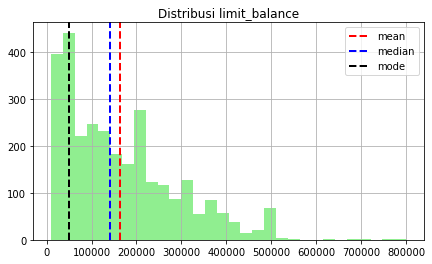

Mean:  163369.30860033727
Median:  140000.0
Modus : 50000
Skewness: 1.0004416437793329


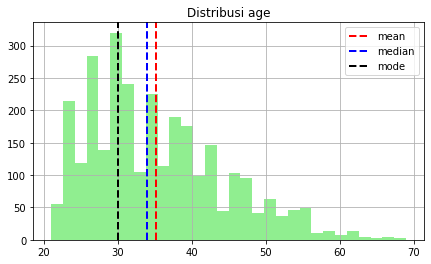

Mean:  35.19325463743676
Median:  34.0
Modus : 30
Skewness: 0.7728871800647299


In [8]:
# Visualisasi distribusi limit_balance dan umur dari nasabah

for column in ['limit_balance', 'age']:
    a = data[column]
    a.hist(bins=30, figsize=(7,4), color='lightgreen')
    plt.axvline(a.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
    plt.axvline(a.median(), color='blue', linestyle='dashed', linewidth=2, label='median')
    plt.axvline(a.mode()[0], color='black', linestyle='dashed', linewidth=2, label='mode')
    plt.legend()
    plt.title(f'Distribusi {column}')
    plt.show()
    print('Mean: ', a.mean())
    print('Median: ', a.median())
    print('Modus :', a.mode()[0])
    print('Skewness:', a.skew())



Dapat dilihat diatas ini, kedua kolom limit_balance maupun age memiliki distribusi tidak normal, hal ini dapat mempengaruhi proses pencarian outliers ataupun scaling nantinya. Untuk limit_balance, median dari limit yang dimiliki nasabah adalah 140000 NT dollars, sedangkan median dari umur adalah 34 tahun.

Selanjutnya saya akan memeriksa selisih dari bill amount dan pay amount. Jika diamati pada tabel, value dari bill amount 6 berhubungan dengan pay amount 5, value dari bill amount 5 berhubungan dengan pay amount 4. Dalam artian, tagihan suatu kartu kredit pada suatu bulan umumnya dibayarkan pada bulan setelahnya. Selisih akan saya cari berdasarkan hubungan tersebut.

In [9]:
# mencari selisih bill amount dan pay amount

diff_april = data['bill_amt_6'] - data['pay_amt_5']
diff_may = data['bill_amt_5'] - data['pay_amt_4']
diff_june = data['bill_amt_4'] - data['pay_amt_3']
diff_july = data['bill_amt_3'] - data['pay_amt_2']
diff_august = data['bill_amt_2'] - data['pay_amt_1']


bill_pay_differences = pd.DataFrame({
    'diff_april' : diff_april,
    'diff_may' : diff_may,
    'diff_june' : diff_june,
    'diff_july' : diff_july,
    'diff_august' : diff_august })

bill_pay_differences

,diff_april,diff_may,diff_june,diff_july,diff_august
0,13874,28789,47803,46630,46174
1,17221,23354,29489,42221,43980
2,20156,35114,40321,42494,58845
3,62733,61478,60248,58248,56248
4,19430,19146,19145,20504,33973
...,...,...,...,...,...
2960,0,0,0,0,0
2961,0,0,0,0,-7
2962,0,0,0,0,0
2963,0,0,0,0,0


In [10]:
# mencari rata-rata pay difference

for column in bill_pay_differences.columns:
    print(f'Rata-rata {column}:', bill_pay_differences[column].mean())

Rata-rata diff_april: 34859.78583473861
Rata-rata diff_may: 36394.70455311973
Rata-rata diff_june: 38939.186172006746
Rata-rata diff_july: 41967.26306913997
Rata-rata diff_august: 44300.2502529511


Dapat dilihat bahwa pada tiap bulannya secara rata-rata masih banyak bill yang belum terbayarkan sepenuhnya.

# 5 - Data Preprocessing

## Get data for model inference

In [11]:
# Mengambil 10 sampel data sebagai data inference

data_inf = data.sample(10, random_state=1)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1765,120000,2,2,2,43,2,2,0,0,0,0,124613,121211,120920,47951,41563,36779,0,3507,2000,2500,2000,1500,1
525,270000,2,2,1,27,0,0,0,2,0,0,24769,22546,21345,14852,18669,25175,4000,5000,0,10000,7000,2000,0
1456,60000,2,2,1,40,0,0,0,-1,-1,-1,25158,18473,7506,4790,6388,5816,5000,1508,4790,6388,6046,17806,0
929,310000,2,1,1,45,0,0,0,0,0,0,91532,93351,96218,97722,101082,103202,3340,4370,4000,5000,3899,3761,0
854,340000,2,2,2,32,0,0,0,0,0,0,80174,82761,83636,85282,87070,88828,3871,3136,3014,3123,3168,4855,0
1178,160000,1,1,2,28,0,0,0,0,0,0,157921,144659,154012,151403,115731,113635,6000,25409,30000,5000,5000,4500,0
2828,80000,2,1,2,27,-1,-1,-1,-2,-1,2,1152,7900,0,0,333,183,7900,0,0,333,0,1500,0
1442,230000,2,1,2,27,0,0,0,0,-1,-1,11406,10097,4600,3234,4696,7062,5097,1060,1000,4696,7062,10898,0
1131,380000,1,1,1,37,0,0,0,0,0,0,83852,88996,77202,70542,65765,58355,13014,5068,2100,1947,2000,1600,0
2583,340000,2,2,2,27,-1,-1,-1,-1,-1,-1,14745,9318,4794,7819,332,16516,9318,5343,7819,332,16516,5000,0


In [12]:
# Mengeluarkan baris data inference pada dataset utama

data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


In [13]:
# Reset index pada dataframe utama dan inference untuk meminimalisir kemungkinan error akibat pengambilan data inference

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Splitting dataset

In [14]:
# memisahkan features dan target

y = data_train_test['default_payment_next_month']
X = data_train_test.drop(columns='default_payment_next_month', axis=1)

In [15]:
# Melakukan train test split (proporsi test 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print('X_Train shape: ', X_train.shape)
print('X_Test shape: ', X_test.shape)
print('y_Train shape: ', y_train.shape)
print('y_Test shape: ', y_test.shape)

X_Train shape:  (2364, 23)
X_Test shape:  (591, 23)
y_Train shape:  (2364,)
y_Test shape:  (591,)


## Handling outliers

In [16]:
# membuat list kolom yang memiliki value true numerikal 

num_columns = ['limit_balance', 'age', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']

print('Jumlah kolom true numerik: ', len(num_columns))

Jumlah kolom true numerik:  14


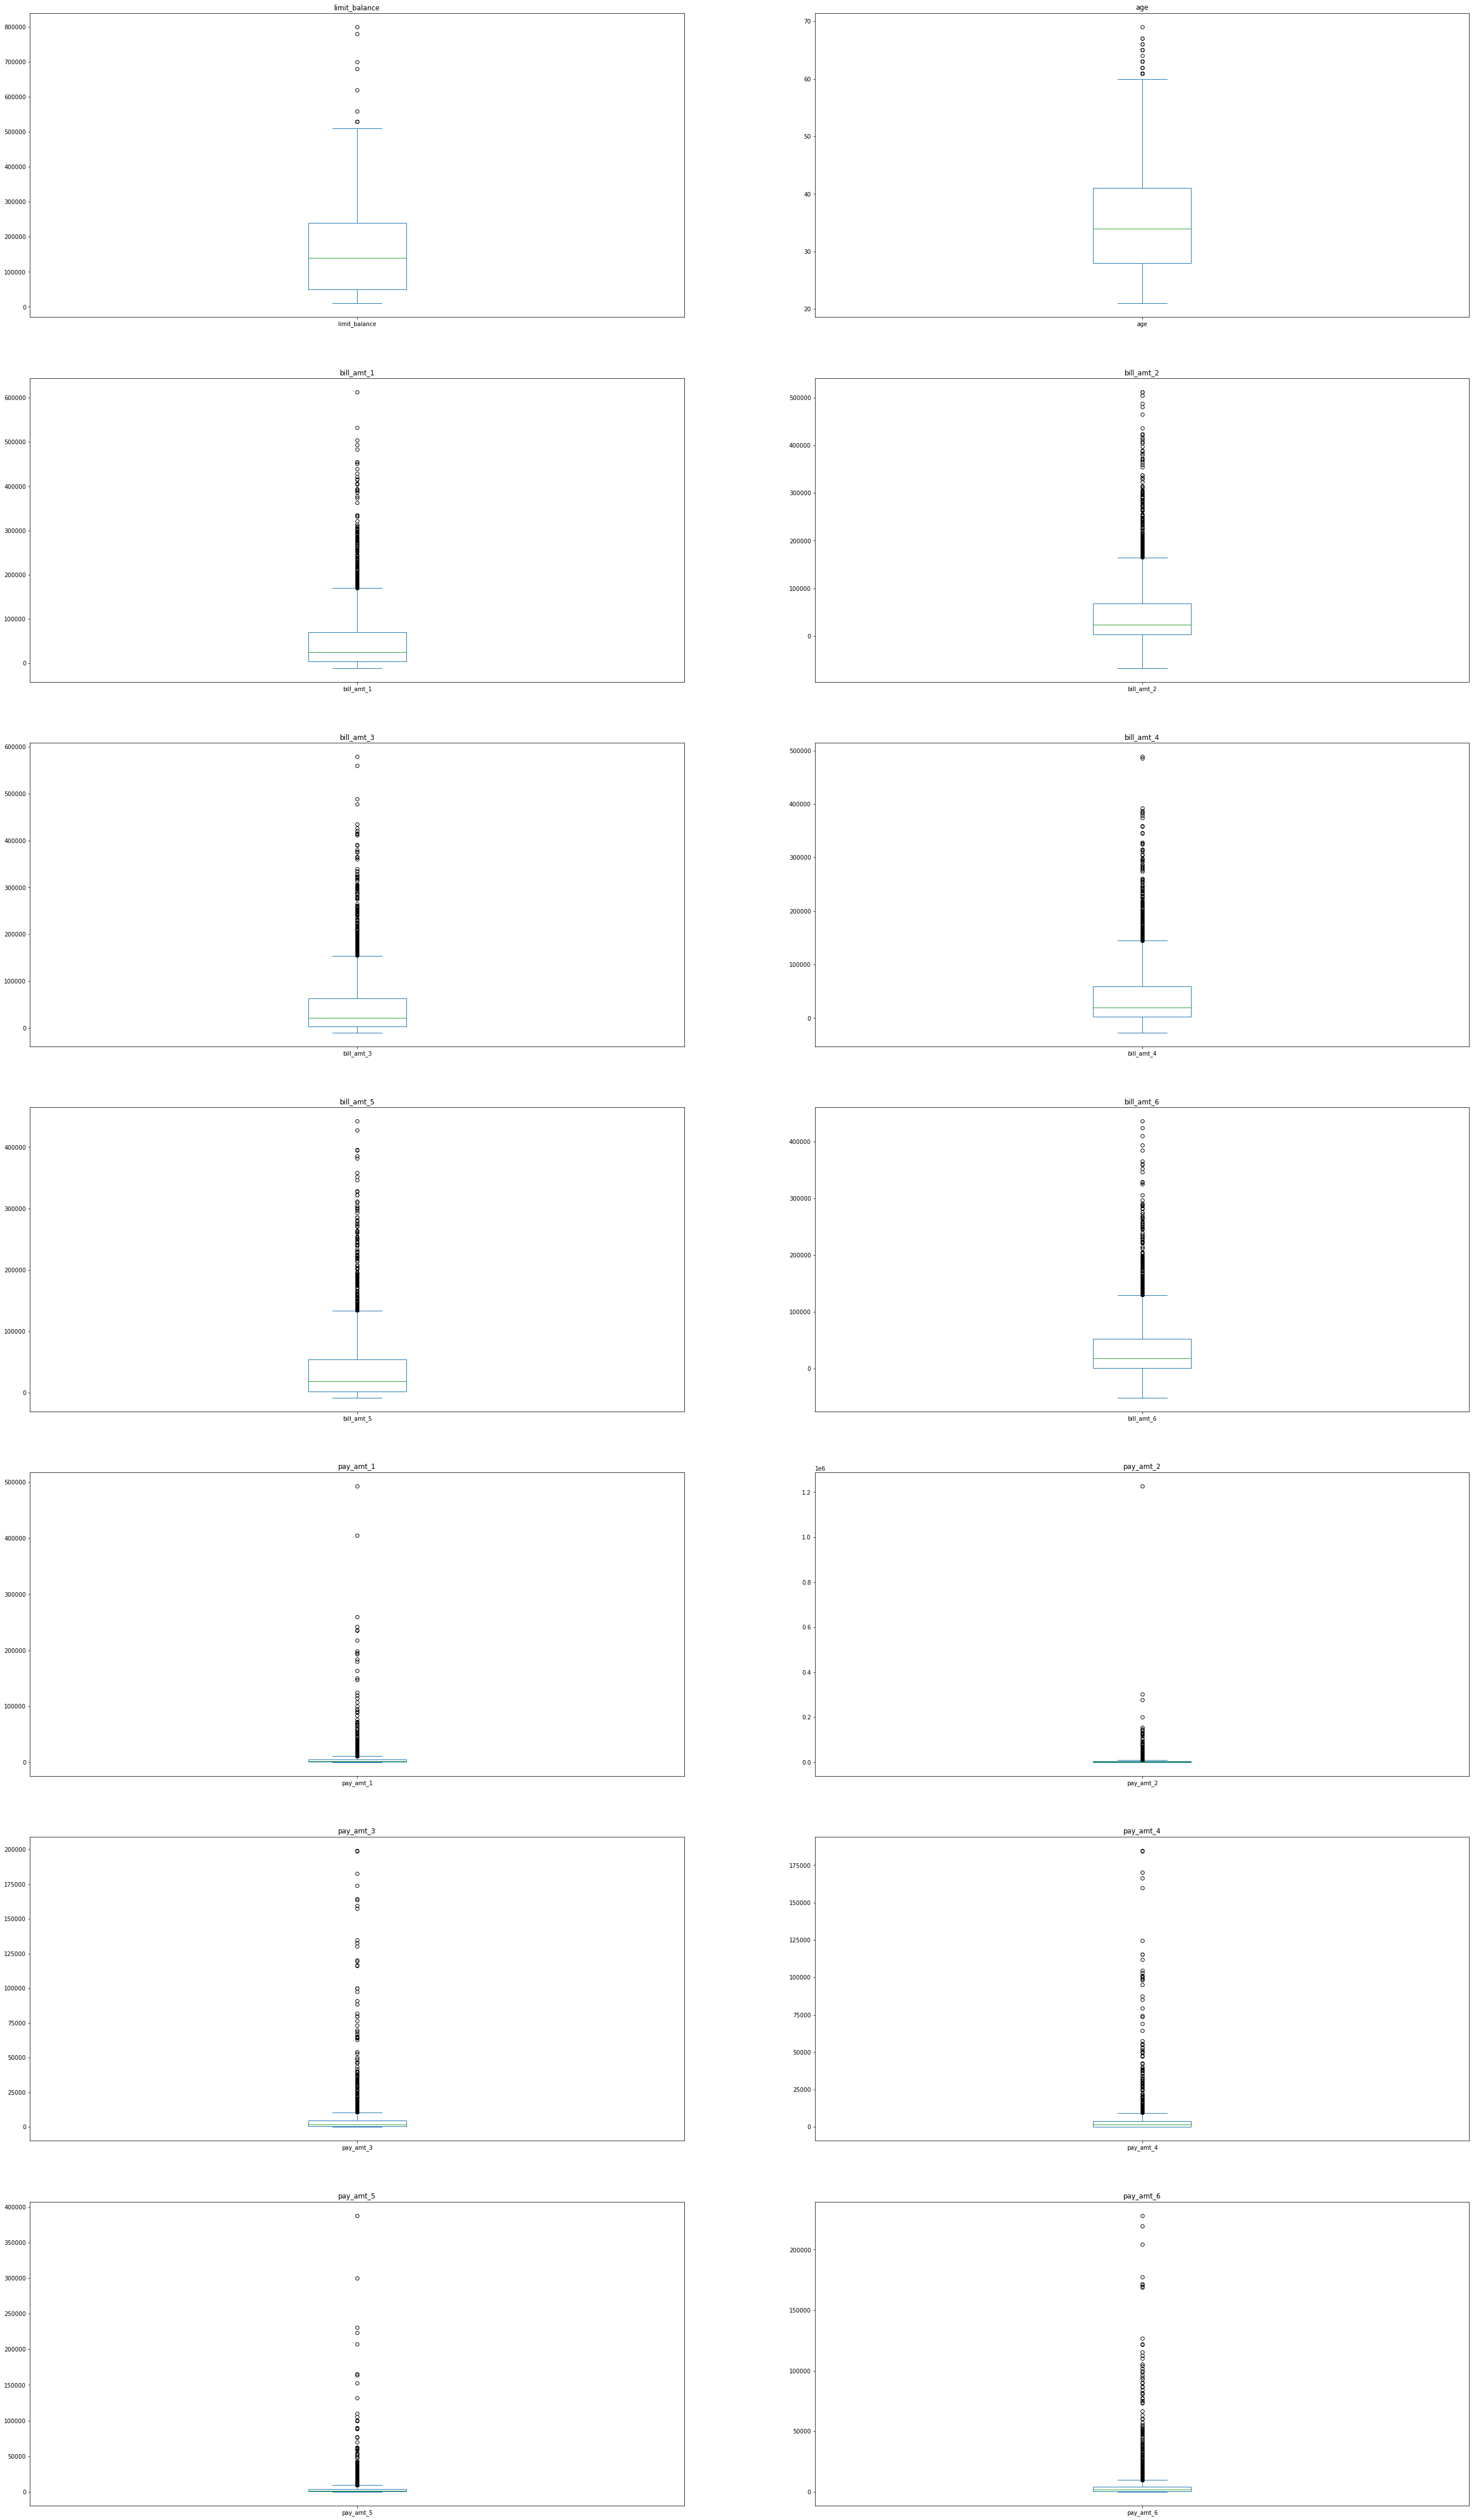

In [17]:
# Mengamati outliers pada kolom numerik menggunakan boxplot

k = 0

figs, axs = plt.subplots(nrows=7, ncols=2,figsize=(45,80))

for i in range(7):
    for j in range(2):
        X_train[num_columns[k]].plot(kind='box', title= num_columns[k], ax=axs[i,j])
        k += 1

plt.show()

Tampak bahwa seluruh kolom memiliki outliers di dalamnya. Selanjutnya saya akan mengamati skewness dan persentase jumlah outliers pada masing-masing kolom untuk menentukan metode handling yang tepat.

In [18]:
# Mendefinisikan fungsi untuk menemukan skewness

def find_skewness(df, numeric_columns):
    for column in numeric_columns:
        print(f'Skewness {column}: ', df[column].skew())

# Mendefinisikan fungsi batas outliers untuk kolom beristribusi normal dan skewed

def find_normal_boundaries(df, column):
    upper_bound = df[column].mean() + 3 * df[column].std()
    lower_bound = df[column].mean() - 3 * df[column].std()
    return upper_bound, lower_bound

def find_skewed_boundaries(df, column, distance):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_bound = df[column].quantile(0.25) - (IQR * distance)
    upper_bound = df[column].quantile(0.75) + (IQR * distance)
    return upper_bound, lower_bound

# Mendefinisikan fungsi untuk menemukan persentase outliers berdasarkan distribusinya

def find_outliers_percentage(df, numeric_columns):
    for column in numeric_columns:
        if df[column].skew() <= 0.5 and df[column].skew() >= -0.5:
            upper_bound, lower_bound = find_normal_boundaries(df, column)
        elif df[column].skew() > 1 or df[column].skew() < -1:
            upper_bound, lower_bound = find_skewed_boundaries(df, column, distance=3) #distance untuk extremely skewed
        else:
            upper_bound, lower_bound = find_skewed_boundaries(df, column, distance=1.5) #distance untuk moderate skewed
        print(f"outliers {column}: ", len( df[(df[column] > upper_bound) | (df[column] < lower_bound)] ) *100 / len(df) , '%')


In [19]:
# menemukan nilai skewness masing-masing kolom

find_skewness(X_train, num_columns)

Skewness limit_balance:  0.9904069144419704
Skewness age:  0.7891195950042466
Skewness bill_amt_1:  2.5499685229520015
Skewness bill_amt_2:  2.500658730562876
Skewness bill_amt_3:  2.6126990675546997
Skewness bill_amt_4:  2.449060258482796
Skewness bill_amt_5:  2.4298271343813216
Skewness bill_amt_6:  2.4993472255999305
Skewness pay_amt_1:  11.67517128214531
Skewness pay_amt_2:  31.110250330903224
Skewness pay_amt_3:  7.758012969073557
Skewness pay_amt_4:  8.077352693665754
Skewness pay_amt_5:  12.531964115880118
Skewness pay_amt_6:  7.409326320781375


Tampak bahwa seluruh kolom memiliki distribusi tidak normal, dimana 'limit_balance' dan 'age' memikili moderate skewness, dan sisanya memiliki extreme skewness. 

In [20]:
# mencari persentase outliers pada masing-masing kolom sesuai dengan jenis distribusinya 

find_outliers_percentage(X_train, num_columns)

outliers limit_balance:  0.38071065989847713 %
outliers age:  0.9729272419627749 %
outliers bill_amt_1:  2.6226734348561758 %
outliers bill_amt_2:  2.66497461928934 %
outliers bill_amt_3:  2.7918781725888326 %
outliers bill_amt_4:  2.5380710659898478 %
outliers bill_amt_5:  2.5803722504230118 %
outliers bill_amt_6:  2.4534686971235193 %
outliers pay_amt_1:  5.668358714043993 %
outliers pay_amt_2:  5.710659898477157 %
outliers pay_amt_3:  5.541455160744501 %
outliers pay_amt_4:  4.441624365482234 %
outliers pay_amt_5:  5.0761421319796955 %
outliers pay_amt_6:  5.83756345177665 %


Karena outliers pada age memiliki nilai yang masih dapat diterima (natural errors) dan tidak memiliki value terlalu jauh dari range data (tidak berpengaruh besar pada proses scaling), maka saya tidak akan menghandling outliers pada kolom tersebut. Saya akan melakukan trimming pada kolom limit balance, dan melakukan capping pada kolom bill dan pay amount (karena akumulasi outliersnya berjumlah cukup banyak, sehingga akan menghilangkan cukup banyak data bila dilakukan trimming)

In [21]:
# Mendefinisikan fungsi untuk trimming outliers

def trimming_outliers(X_df, y_df, numeric_columns):
    X_df = X_df.copy()
    y_df = y_df.copy()
    for column in numeric_columns:
        if X_df[column].skew() <= 0.5 and X_df[column].skew() >= -0.5:
            upper_bound, lower_bound = find_normal_boundaries(X_df, column)
        elif X_df[column].skew() > 1 or X_df[column].skew() < -1:
            upper_bound, lower_bound = find_skewed_boundaries(X_df, column, distance=3)
        else:
            upper_bound, lower_bound = find_skewed_boundaries(X_df, column, distance=1.5)
        outliers_df = X_df[ (X_df[column] > upper_bound) | (X_df[column] < lower_bound) ]
        X_df.drop(outliers_df.index, axis=0, inplace = True)
        y_df.drop(outliers_df.index, axis=0, inplace = True)
    return X_df, y_df

In [22]:
# trimming outliers pada kolom limit_balance

X_train_trimmed, y_train_trimmed = trimming_outliers(X_train, y_train, ['limit_balance'])
print('X_train shape: ',X_train.shape)
print('X_train_trimmed shape: ',X_train_trimmed.shape)
print('y_train shape: ',y_train.shape)
print('y_train_trimmed shape: ',y_train_trimmed.shape)

X_train shape:  (2364, 23)
X_train_trimmed shape:  (2355, 23)
y_train shape:  (2364,)
y_train_trimmed shape:  (2355,)


In [23]:
# capping kolom bill amount dan pay amount

windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=3, # karena data highly skewed menggunakan fold =3
                          variables=['bill_amt_1',
                                    'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                                    'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
                                    'pay_amt_6'])

windsoriser.fit(X_train_trimmed)

X_train_trimcap = windsoriser.transform(X_train_trimmed)

In [24]:
# melihat minimum caps masing-masing kolom
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# melihat maksimum caps masing-masing kolom
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'bill_amt_1': -195986.0, 'bill_amt_2': -191303.0, 'bill_amt_3': -177816.5, 'bill_amt_4': -167874.5, 'bill_amt_5': -155869.0, 'bill_amt_6': -151701.0, 'pay_amt_1': -11213.0, 'pay_amt_2': -11265.5, 'pay_amt_3': -11645.5, 'pay_amt_4': -10800.0, 'pay_amt_5': -10736.0, 'pay_amt_6': -11608.5}
Right Tail Caps :  {'bill_amt_1': 269542.0, 'bill_amt_2': 262318.0, 'bill_amt_3': 244528.5, 'bill_amt_4': 229662.5, 'bill_amt_5': 211844.5, 'bill_amt_6': 205313.0, 'pay_amt_1': 17284.0, 'pay_amt_2': 17214.0, 'pay_amt_3': 16687.0, 'pay_amt_4': 15100.0, 'pay_amt_5': 15052.0, 'pay_amt_6': 15877.0}


In [25]:
# Menampilkan X_train sebelum di capping 

print('X_train - Before Capping')
X_train_trimmed.describe()

X_train - Before Capping


,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2.355000e+03,2355.000000,2355.000000,2355.000000,2355.000000
mean,163146.496815,1.612739,1.839066,1.555414,35.176221,0.013588,-0.135032,-0.161359,-0.202548,-0.244161,-0.261571,52323.557962,51101.464968,48702.735456,44448.025478,41354.356688,39867.383015,6541.874735,6.252771e+03,5342.733333,4478.472187,4766.986412,5386.329087
std,122236.981103,0.487228,0.775585,0.521223,9.112016,1.134828,1.192062,1.186637,1.169273,1.155793,1.177326,73002.911594,71836.959104,69116.102251,62326.403700,58901.616824,57734.589251,22103.550248,2.962477e+04,14983.069072,12662.276514,16654.848514,16237.881069
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-9850.000000,-27490.000000,-7941.000000,-51183.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3526.000000,3106.000000,3188.500000,2498.500000,1722.500000,1305.000000,1000.000000,9.400000e+02,497.000000,300.000000,316.000000,171.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24717.000000,23227.000000,21362.000000,19896.000000,18925.000000,18475.000000,2200.000000,2.192000e+03,2000.000000,1650.000000,1599.000000,1610.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70030.000000,67909.000000,63523.500000,59289.500000,54253.000000,52307.000000,5071.000000,5.008500e+03,4544.500000,4000.000000,4000.000000,4097.500000
max,510000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,184637.000000,388071.000000,228300.000000


In [26]:
# Menampilkan X_train setelah di capping (X_train yang sudah di trimming dan capping saya definisikan sebagai X_train_trimcap)

print('X_train - After Capping')
X_train_trimcap.describe()

X_train - After Capping


,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000
mean,163146.496815,1.612739,1.839066,1.555414,35.176221,0.013588,-0.135032,-0.161359,-0.202548,-0.244161,-0.261571,50384.092569,49094.115074,46454.980467,42773.317622,39695.830361,38160.819108,4052.254777,3942.564331,3526.066242,3024.047983,3044.263694,3190.527813
std,122236.981103,0.487228,0.775585,0.521223,9.112016,1.134828,1.192062,1.186637,1.169273,1.155793,1.177326,64704.027879,63453.555163,59693.612269,55382.671790,52094.422974,50656.037880,4696.242434,4607.949109,4481.844846,3850.984113,3913.807963,4235.543197
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-9850.000000,-27490.000000,-7941.000000,-51183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3526.000000,3106.000000,3188.500000,2498.500000,1722.500000,1305.000000,1000.000000,940.000000,497.000000,300.000000,316.000000,171.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24717.000000,23227.000000,21362.000000,19896.000000,18925.000000,18475.000000,2200.000000,2192.000000,2000.000000,1650.000000,1599.000000,1610.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70030.000000,67909.000000,63523.500000,59289.500000,54253.000000,52307.000000,5071.000000,5008.500000,4544.500000,4000.000000,4000.000000,4097.500000
max,510000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,269542.000000,262318.000000,244528.500000,229662.500000,211844.500000,205313.000000,17284.000000,17214.000000,16687.000000,15100.000000,15052.000000,15877.000000


Proses trimming dan capping pada data train telah selesai.

## Handling missing values

In [27]:
# Mengamati missing values

print('Missing Values X_train:', X_train_trimcap.isnull().sum().sum())
print('Missing Values X_test:', X_test.isnull().sum().sum())
print('Missing Values y_train:', y_train_trimmed.isnull().sum())
print('Missing Values y_test:', y_test.isnull().sum())

Missing Values X_train: 0
Missing Values X_test: 0
Missing Values y_train: 0
Missing Values y_test: 0


Tampak tidak terdapat missing values pada dataset yang digunakan.

## Feature selection

Pertama-tama saya akan mencari korelasi antara kolom pada X_train dengan y_train untuk memilih variabel yang sekiranya terkualifikasi untuk dijadikan features.

In [28]:
# Mencari korelasi kolom train terhadap target 

X_train_correlation = pd.concat([y_train_trimmed, X_train_trimcap], axis=1).corr()['default_payment_next_month'].sort_values().reset_index()
X_train_correlation

,index,default_payment_next_month
0,limit_balance,-0.154997
1,pay_amt_2,-0.149922
2,pay_amt_1,-0.121274
3,pay_amt_6,-0.119344
4,pay_amt_4,-0.106187
5,pay_amt_3,-0.105448
6,pay_amt_5,-0.093586
7,marital_status,-0.030741
8,bill_amt_1,-0.008247
9,sex,-0.005168


Karena seluruh kolom memiliki korelasinya masing-masing terhadap target, maka saya akan mengambil seluruhnya sebagai features.

In [29]:
X_train_trimcap

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2399,60000,2,3,2,22,-1,-1,-1,-1,0,0,4049.0,1808.0,3496.0,11548.0,14519.0,5861.0,1815.0,3496.0,11548.0,3500.0,200.0,1100.0
557,20000,2,2,1,37,0,0,0,0,0,0,19326.0,20240.0,17800.0,18699.0,17770.0,48321.0,1263.0,1630.0,1529.0,1200.0,2000.0,742.0
1607,50000,2,2,1,24,1,2,0,0,0,2,27087.0,26372.0,26992.0,27693.0,29237.0,28607.0,0.0,1400.0,1100.0,2100.0,0.0,1000.0
561,80000,1,3,1,29,0,0,0,0,0,0,42488.0,43805.0,45126.0,45775.0,48033.0,56981.0,2000.0,2051.0,1700.0,3000.0,10000.0,2200.0
2698,230000,1,1,2,27,-1,-1,-1,-1,-1,-1,5652.0,7652.0,2062.0,2007.0,2104.0,394.0,7662.0,2066.0,2007.0,2108.0,394.0,3214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,20000,2,1,2,25,-1,-1,-1,-1,-1,-2,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0
905,50000,1,2,2,26,0,0,0,0,0,0,47169.0,48197.0,47738.0,47676.0,46694.0,47807.0,1804.0,1746.0,1681.0,1695.0,1890.0,4005.0
1096,260000,2,1,2,30,0,0,0,0,0,0,162241.0,137320.0,126479.0,110217.0,102703.0,84519.0,5045.0,8016.0,5000.0,4000.0,4014.0,3000.0
235,250000,1,1,1,34,0,0,0,0,0,0,269542.0,252913.0,243075.0,229662.5,175005.0,179687.0,17284.0,8800.0,9011.0,6000.0,7000.0,6009.0


In [30]:
X_train_trimcap.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6'],
      dtype='object')

In [31]:
# Mendefinisikan features bervalue numerik

num_features = ['limit_balance', 'age', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6']

In [32]:
# Mendefinisikan features bervalue kategorik

cat_features = ['sex', 'education_level','marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

Total features pilihan = 23 features

## Feature scaling 

Karena seluruh feature kategorik sudah ter-encode, maka saya hanya akan melakukan scaling pada feature numerik

In [33]:
# melihat distribusi kolom numerik

find_skewness(X_train_trimcap, num_features)

Skewness limit_balance:  0.8713035470969392
Skewness age:  0.7929546367508988
Skewness bill_amt_1:  1.7759791521211068
Skewness bill_amt_2:  1.7686766379429255
Skewness bill_amt_3:  1.752494913528094
Skewness bill_amt_4:  1.7514899259427346
Skewness bill_amt_5:  1.7183374961032007
Skewness bill_amt_6:  1.72453456140392
Skewness pay_amt_1:  1.622599448058974
Skewness pay_amt_2:  1.668951246377966
Skewness pay_amt_3:  1.8151360826147025
Skewness pay_amt_4:  1.8276156728939033
Skewness pay_amt_5:  1.8337769535400807
Skewness pay_amt_6:  1.8432229158960176


Karena sebagian besar data memiliki distribusi tidak normal, maka saya akan melakukan scaling dengan MinMaxScaler

In [34]:
# mendefinisikan make_column_transformer

column_trans = make_column_transformer(
    (MinMaxScaler(), num_features),
    remainder='passthrough', sparse_threshold=0
)

In [35]:
# scaling data menggunakan make_column transformer

X_train_final = column_trans.fit_transform(X_train_trimcap)
X_test_final = column_trans.transform(X_test)

# menserasikan nama variabel y akhir agar memudahkan pemanggilan nantinya
y_train_final = y_train_trimmed
y_test_final = y_test

In [36]:
# Melihat gambaran akhir data train test

print('X_train_final:', X_train_final.shape)
print('X_test_final:', X_test_final.shape)
print('y_train_final:', y_train_final.shape)
print('y_test_final:', y_test_final.shape)

X_train_final: (2355, 23)
X_test_final: (591, 23)
y_train_final: (2355,)
y_test_final: (591,)


# 6 - Model definition

Karena prediksi yang akan dilakukan merupakan klasifikasi, maka model yang akan saya gunakan merupakan model bertipe classifier, diantaranya adalah logistic regression, support vector machine classifier, decision tree, random forest, k neirest neighbors, naive bayes, dan ada boost classifier.

In [37]:
model_log_reg = LogisticRegression()
model_svm = SVC()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_knn = KNeighborsClassifier()
model_nb = GaussianNB()
model_ab = AdaBoostClassifier()

# 7 - Model training and evaluation

Training dan evaluasi model akan saya lakukan secara bertahap dimulai dari masing-masing baseline model (default hyperparameter), lalu saya akan memilih model dengan hasil cross validation terbaik untuk dilakukan hyperparameter tuning menggunakan GridSearch, terakhir saya akan membandingkan performa model terpilih sebelum dan sesudah dilakukan hyperparameter tuning.

Karena target yang dimiliki memiliki proporsi imbalance antara kategori 0 (default_payment_next_month = 'No') dan kategori 1 (default_payment_next_month = 'Yes), maka metrik evaluasi yang saya gunakan adalah f1 score, hal ini dikarenakan metrik akurasi cenderung menimbulkan bias interpretasi pada data yang imbalance. Setelah itu, saya akan menampilkan hasil mean dan standar deviasi f1 score berdasarkan cross_validation.

In [38]:
# Menampilkan proporsi imbalance pada target

print("proporsi kategori 1 ('Yes') pada target: ", len(y_train_final[y_train_final == 1])/len(y_train_final))
print("proporsi kategori 0 ('No') pada target: ", len(y_train_final[y_train_final == 0])/len(y_train_final))

proporsi kategori 1 ('Yes') pada target:  0.21443736730360935
proporsi kategori 0 ('No') pada target:  0.7855626326963907


## Cross Validation baseline model

In [39]:
# Cross validation baseline model logistic regression

scores_log_reg = cross_val_score(model_log_reg, X_train_final, y_train_final, cv=5, scoring='f1')
print('Cross validation mean:', scores_log_reg.mean())
print('Cross validation std:', scores_log_reg.std())

Cross validation mean: 0.38460773557763195
Cross validation std: 0.053722039829098504


/Users/bandorogunarso/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Cross validation baseline model svm

scores_svm = cross_val_score(model_svm, X_train_final, y_train_final, cv=5, scoring='f1')
print('Cross validation mean:', scores_svm.mean())
print('Cross validation std:', scores_svm.std())

Cross validation mean: 0.5001864490209609
Cross validation std: 0.07848840623469877


In [41]:
# Cross validation baseline model decision tree

scores_dt = cross_val_score(model_dt, X_train_final, y_train_final, cv=5, scoring='f1')
print('Cross validation mean:', scores_dt.mean())
print('Cross validation std:', scores_dt.std())

Cross validation mean: 0.4130801107527695
Cross validation std: 0.030803988095881824


In [42]:
# Cross validation baseline model random forest

scores_rf = cross_val_score(model_rf, X_train_final, y_train_final, cv=5, scoring='f1')
print('Cross validation mean:', scores_rf.mean())
print('Cross validation std:', scores_rf.std())

Cross validation mean: 0.487276926730755
Cross validation std: 0.057729727099118645


In [43]:
# Cross validation baseline model knn

scores_knn = cross_val_score(model_knn, X_train_final, y_train_final, cv=5, scoring='f1')
print('Cross validation mean:', scores_knn.mean())
print('Cross validation std:', scores_knn.std())

Cross validation mean: 0.4586679301980189
Cross validation std: 0.05154795057912274


In [44]:
# Cross validation baseline model naive bayes

scores_nb = cross_val_score(model_nb, X_train_final, y_train_final, cv=5, scoring='f1')
print('Cross validation mean:', scores_nb.mean())
print('Cross validation std:', scores_nb.std())

Cross validation mean: 0.5138357681470985
Cross validation std: 0.033562696933200346


In [45]:
# Cross validation baseline model ada boost

scores_ab = cross_val_score(model_ab, X_train_final, y_train_final, cv=5, scoring='f1')
print('Cross validation mean:', scores_ab.mean())
print('Cross validation std:', scores_ab.std())

Cross validation mean: 0.4631787083029625
Cross validation std: 0.06156905279973715


Berdasalkan hasil cross validation, model Naive Bayes mendapatkan performa terbaik karena memiliki mean f1 score tertinggi (0.5138) dengan standar deviasi terendah (0.033562). Selanjutnya saya akan melakukan hyperparameter tuning terhadap model ini.

## Hyperparameter tuning model dengan performa terbaik (Naive Bayes)

In [46]:
# melihat hyperparameter yang dimiliki model

model_nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [47]:
# mendefinisikan hyperparameter yang ingin diuji

params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [48]:
# cross validasi variasi hyperparameter menggunakan gridsearch

grid_search_nb = GridSearchCV(estimator=model_nb, param_grid=params_nb, scoring='f1', cv=5, return_train_score=True)
grid_search_nb.fit(X_train_final, y_train_final)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='f1')

In [49]:
# melihat hyperparameter terbaik

print('Best hyperparameter for gaussian Naive Bayes: ', grid_search_nb.best_params_)

Best hyperparameter for gaussian Naive Bayes:  {'var_smoothing': 0.006579332246575682}


In [50]:
# melihat skor cross validation dari model dengan hyperparameter terbaik

print('f1 score train: ', grid_search_nb.best_score_)

f1 score train:  0.5198336340424389


In [51]:
# mendefinisikan model dengan hyperparameter terbaik

model_nb_best = grid_search_nb.best_estimator_

In [52]:
# menguji model dengan hyperparameter terbaik pada data test

model_nb_best.fit(X_train_final, y_train_final)
y_test_pred_nb_best = model_nb_best.predict(X_test_final)

print('f1 score test: ', f1_score(y_test_final, y_test_pred_nb_best))
print('acc score test: ', accuracy_score(y_test_final, y_test_pred_nb_best))

f1 score test:  0.5343511450381678
acc score test:  0.7935702199661591


* Performa Naive Bayes sebelum dilakukan hyperparameter tuning (f1 score): 0.5138357681470985

* Performa Naive Bayes pasca dilakukan hyperparameter tuning:
    - f1 score train:  0.5198336340424389
    - f1 score test:  0.5343511450381678

Dari hasil training dan evaluasi model diatas, beberapa hal yang dapat saya simpulkan adalah:

1. Dari seluruh baseline model klasifikasi yang digunakan, model Naive Bayes (Gaussian) menunjukan performansi terbaik dengan hasil cross validation mean (f1 score): 0.5138357681470985, dengan standar deviasi: 0.06156905279973715.

2. Pasca dilakukan hyperparameter tuning dengan grid search, ditemukan sedikit peningkaan performansi f1 score (0.513--> 0.519) pada model yang memiliki hyperparameter 'var_smoothing': 0.006579332246575682 (hyperparameter baseline: 'var_smoothing': 1e-09). Nilai var_smoothing itu sendiri menyatakan besarnya porsi variance terbesar dari seluruh fitur yang ditambahkan pada variansi yang ada untuk meningkatkan stabilitas perhitungan model (source: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

3. Nilai f1 score sendiri menggambarkan rata-rata dari precision dan recall yang dimiliki sebuah model, dimana precision menyatakan kemampuan model untuk mendapatkan True Positif dari seluruh prediksi positifnya (mempertimbangkan false positive), dan recall menyatakan proporsi prediksi positif model dari seluruh nilai true positive (mempertimbangkan false negative). 

4. Dari sumber yang saya baca, pada umumnya nilai f1 score >50 merupakan performa yang masih dapat diterima pada suatu model klasifikasi, hal ini berartikan bahwa nilai f1 score model Naive Bayes yang saya punya (0.519 terhadap train, dan 0.534 terhadap test) secara umum masih dapat diterima sebelum nantinya dapat dikembangkan lebih lanjut (source: https://stephenallwright.com/good-f1-score/).

5. Kedepannya kemampuan prediksi model dapat dikembangkan dengan menambahkan jumlah data training (saat ini dataset yang digunakan baru terdiri dari 2965 data), improvement juga dapat dilakukan dengan analisis lebih lanjut atau penambahan features yang memang berpengaruh terhadap outcome target, pengaturan hyperparameter yang sesuai juga dapat dilakukan pada proses kedepannya.

# 8 - Model inference

In [53]:
# menampilkan data inference

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,120000,2,2,2,43,2,2,0,0,0,0,124613,121211,120920,47951,41563,36779,0,3507,2000,2500,2000,1500,1
1,270000,2,2,1,27,0,0,0,2,0,0,24769,22546,21345,14852,18669,25175,4000,5000,0,10000,7000,2000,0
2,60000,2,2,1,40,0,0,0,-1,-1,-1,25158,18473,7506,4790,6388,5816,5000,1508,4790,6388,6046,17806,0
3,310000,2,1,1,45,0,0,0,0,0,0,91532,93351,96218,97722,101082,103202,3340,4370,4000,5000,3899,3761,0
4,340000,2,2,2,32,0,0,0,0,0,0,80174,82761,83636,85282,87070,88828,3871,3136,3014,3123,3168,4855,0
5,160000,1,1,2,28,0,0,0,0,0,0,157921,144659,154012,151403,115731,113635,6000,25409,30000,5000,5000,4500,0
6,80000,2,1,2,27,-1,-1,-1,-2,-1,2,1152,7900,0,0,333,183,7900,0,0,333,0,1500,0
7,230000,2,1,2,27,0,0,0,0,-1,-1,11406,10097,4600,3234,4696,7062,5097,1060,1000,4696,7062,10898,0
8,380000,1,1,1,37,0,0,0,0,0,0,83852,88996,77202,70542,65765,58355,13014,5068,2100,1947,2000,1600,0
9,340000,2,2,2,27,-1,-1,-1,-1,-1,-1,14745,9318,4794,7819,332,16516,9318,5343,7819,332,16516,5000,0


In [54]:
# mentransformasi data_inf sesuai features yang telah saya pilih menggunakan make_column_transformer yang telah saya definisikan sebelumnya 

data_inf_transformed = column_trans.transform(data_inf)

In [55]:
# Predict data inf menggunakan model naive bayes terbaik 

data_inf_pred_nb = model_nb_best.predict(data_inf_transformed)

In [56]:
# membuat kolom baru yang berisi hasil prediksi

data_inf['Naive Bayes prediction'] = data_inf_pred_nb

In [57]:
# Menampilkan data inference beserta hasil prediksi

data_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,Naive Bayes prediction
0,120000,2,2,2,43,2,2,0,0,0,0,124613,121211,120920,47951,41563,36779,0,3507,2000,2500,2000,1500,1,1
1,270000,2,2,1,27,0,0,0,2,0,0,24769,22546,21345,14852,18669,25175,4000,5000,0,10000,7000,2000,0,0
2,60000,2,2,1,40,0,0,0,-1,-1,-1,25158,18473,7506,4790,6388,5816,5000,1508,4790,6388,6046,17806,0,0
3,310000,2,1,1,45,0,0,0,0,0,0,91532,93351,96218,97722,101082,103202,3340,4370,4000,5000,3899,3761,0,0
4,340000,2,2,2,32,0,0,0,0,0,0,80174,82761,83636,85282,87070,88828,3871,3136,3014,3123,3168,4855,0,0
5,160000,1,1,2,28,0,0,0,0,0,0,157921,144659,154012,151403,115731,113635,6000,25409,30000,5000,5000,4500,0,0
6,80000,2,1,2,27,-1,-1,-1,-2,-1,2,1152,7900,0,0,333,183,7900,0,0,333,0,1500,0,0
7,230000,2,1,2,27,0,0,0,0,-1,-1,11406,10097,4600,3234,4696,7062,5097,1060,1000,4696,7062,10898,0,0
8,380000,1,1,1,37,0,0,0,0,0,0,83852,88996,77202,70542,65765,58355,13014,5068,2100,1947,2000,1600,0,0
9,340000,2,2,2,27,-1,-1,-1,-1,-1,-1,14745,9318,4794,7819,332,16516,9318,5343,7819,332,16516,5000,0,0


Diatas ini dapat dilihat bahwa model naive bayes dengan f1 score 0.519 yang saya miliki dapat memprediksi seluruh data inference secara tepat.

# 9 - Kesimpulan

Setelah melakukan eksplorasi data dan pembuatan model prediksi 'default pembayaran credit card bulan selanjutnya' terhadap dataset yang berisi informasi pengguna credit card, berikut ini kesimpulan yang dapat saya ambil:

1. Dataset yang saya gunakan terdiri dari 2965 baris dan 24 kolom. Dimana tiap baris mewakili tiap-tiap nasabah credit card dan kolom mewakili informasi terkait jenis kelamin, tingkat pendidikan, dan history billing dan payment yang dimiliki nasabah tersebut.

2. Dari 25974 baris kumpulan informasi penduduk, saya mengambil 10 data sebagai data inference, 80% sisanya sebagai data training, dan 20% sisanya sebagai data testing. Dari 23 kolom yang berisi fitur-fitur yang berkemungkinan mempengaruhi default pembayaran bulan selanjutnya, saya memilih seluruhnya untuk disertakan kedalam training set model. 23 fitur tersebut terdiri dari gabungan data numerik dan kategorik yang telah diseleksi berdasarkan analisa korelasi (untuk kolom numerik) dan analisis secara manual (untuk kolom kategorik).

3. Karena prediksi yang diharapkan berupa klasifikasi default payment bulan depan dari credit cart (Yes atau No), maka saya menggunakan berbagai algoritma klasifikasi sebagai model. Dimana didapatkan bahwa algoritma Gaussian Naive Bayes memiliki performansi cross validation terbaik dari model lainnya (f1 score baseline: 0.513). Performa ini meningkat pasca dilakukan hyperparameter tuning dengan 'var_smoothing': 0.006579332246575682 (f1 score train: 0.519, f1 score test:  0.534).

4. Dalam scope industri dari credit card itu sendiri, hal ini dapat berartikan bahwa model yang saya miliki memiliki kemampuan yang cukup untuk memprediksi apakah nasabah akan melakukan pembayaran atau tidak pada bulan berikutnya (Treshold performansi f1 score yang digunakan adalah 0.5).

5. Improvement lebih lanjut dibutuhkan terhadap model ini, baik dengan mengatur hyperparameter yang digunakan, maupun menambah jumlah data training yang berkualitas. Jika performa model tidak meningkat dengan kedua metode tersebut, maka pemilihan model lain dapat dipertimbangkan.

# Conceptual Problems

`1. Apakah fungsi parameter criterion pada Decision Tree?`

- parameter criterion pada decision tree memiliki kegunaan untuk mengatur tipe perhitungan impurity dari algoritma tersebut. Tergapat 2 pilihan, antara lain gini dan entropy. 
- Perhitungan impurity ini berlaku dalam menentukan apakah algoritma decision tree tersebut akan tetap melakukan splitting atau tidak dilihat dari impuritas yang berada pada lokasi percabangan (nodes) tersebut. 
- Bagaimanapun, metode gini dan entropy memiliki keunggulannya masing-masing, dimana metode gini dapat berguna dalam mengurangi false-classification, sedangkan metode entropy memiliki keunggulan dalam exploratory analysis.
(source: https://holypython.com/dt/decision-tree-optimization-parameters/)

`2. Apakah fungsi dari pruning pada Tree model?`

- Model decision tree memiliki suatu kekurangan, yakni mudah mengalami overfitting terhadap data training yang digunakan. Hal ini terjadi karena sifat dasar dari decision tree tersebut yang akan mengklasifikasikan kategori hingga ujung (leaf node) dengan impuritas terendah. Meskipun memberi hasil yang baik untuk data training, tapi klasifikasi yang terlalu spesifik ini dapat menimbulkan misklasifikasi pada data baru selain yang digunakan untuk training.
- Hal ini dapat diatasi dengan melakukan pruning pada model decision tree tersebut. Prunning disini berarti mengurangi percabangan daripada decision tree dengan mengatur nilai impuritas dan jumlah data yang masih dapat ditolerir sebagai kriteria penentuan ujung (leaf node) dari decision tree tersebut. Hal ini dapat membangtu mengurangi percabangan yang berlebihan dan meningkatkan performa algorima terhadap data yang belum pernah dilihat sebelumnya. (source: https://www.displayr.com/machine-learning-pruning-decision-trees/)

`3. Bagaimana cara memilih K yang optimal pada KNN?`

- K optimal dapat ditentukan dengan melakukan visualisasi terhadap hasil cross validation terhadap nilai K yang berbeda-beda, hasil visualisasi tersebut akan menujukan nilai K optimal yang menghasilkan skor (Cross validation mean dan std) terbaik.
- Pertanyaannya selanjutnya adalah bagaimana menentukan rentang nilai K yang akan kita uji? Sebagai rule of thumb, pada awalnya kita dapat memilih K senilai square root (akar) dari jumlah data (misal kita memiliki 441 data maka, 21 dapat menjadi nilai K awal).
- Selanjutnya kita dapat memilih nilai K lain yang berada di sekitar K awal tersebut, misalkan saja saya memilih K yang berentang lebih besar atau lebih kecil 20 poin dari nilai dari K awal (berarti K berentang antara 1-49, dimana K merupakan angka ganjil agar tidak menghasilkan voting seri), rentang K inilah yang nanti akan kita uji dengan cross validation dan divisualisasi. (source: https://www.youtube.com/watch?v=j-uHsi-KjOs , https://stats.stackexchange.com/questions/183541/rule-of-thumb-for-k-value-in-k-nearest-neighbor)

`4. Jelaskan apa yang kalian ketahui tentang Cross Validation!`

- Cross validation adalah salah satu jenis evaluasi performance dari model machine learning yang bekerja melalui metode iterative resampling, dalam artian, proses training dan prediction dari model akan dilakukan beberapa kali menggunakan kombinasi berbeda (train & validation) dari suatu dataset tertentu.
- Kombinasi data yang digunakan untuk training dan prediction model akan ditentukan berdasarkan jumlah segmen (fold) yang kita pilih dari data yang dimiliki. Selanjutnya iterasi akan dilakukan berdasarkan jumlah fold yang kita pilih (misal kita memilih fold = 5, maka iterasi akan dilakukan 5 kali terhadap kombinasi train & validation yang berbeda)
- Nilai evaluasi dari seluruh kombinasi ini nantinya akan menghasilkan mean dan standar deviasi yang dapat kita gunakan sebagai acuan untuk menilai konsistensi performa dari suatu model. Semakin besar mean dan semakin kecil standar deviasi yang dihasilkan, maka semakin bagus pula performa dari model tersebut. (source: https://en.wikipedia.org/wiki/Cross-validation_(statistics))

`5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!`

- Accuracy, precision, recall, dan f1 score adalah metrik evaluasi yang digunakan untuk menentukan performa sebuah classification model. Masing-masing memiliki karakteristik yang berbeda-beda.
- Nilai accuracy ditentukan bedasarkan jumlah prediksi yang tepat dari jumlah data yang diprediksi (TP / TP+TN+FP+FN). Hal ini dapat menggambarkan performa model terhadap data yang balance (jumlah target negatif dan positif seimbang), namun cenderung menimbulkan bias interpretasi pada model yang memiliki data imbalance karena pada kondisi ini nilai accuracy akan disokong oleh data yang memiliki proporsi lebih besar dalam kasus tersebut.
- Untuk data imbalance, nilai precision, recall, dan f1 score dianggap lebih representatif.
- Nilai precision menggambarkan jumlah prediksi yang True Positive dari keseluruhan yang diprediksi positif (TP/ TP+FP). Nilai ini mempertimbangkan jumlah False Positive dari model, dimana jika False Positive makin kecil, maka nilai precision makin tinggi. Model high precision dibutuhkan pada kasus dimana outcome False Positif dari suatu model memiliki konsekuensi yang lebih merugikan, misalnya saja pada kasus CIA fingerprint recognition, dimana prediksi False positive (seseorang yang bukan CIA dianggap sebagai CIA) dapat menimbulkan bocornya dokumen rahasia negara.
- Nilai recall menggambarkan jumlah prediksi yang True Positif dari keseluruhan target yang Real positive (TP/ TP+FN). Nilai ini mempertimbangkan jumlah False Negativenya dari model, dimana semakin kecil False Negative, maka nilai recall semakin tinggi. Model high recall dibutuhkan pada kasus dimana outcome False Negatif suatu model memiliki konsekuensi yang lebih merugikan. Misalnya saja kasus prediksi infeksi COVID, jumlah False Negative yang besar (seseorang yang COVID diprediksi sebagai bukan COVID) akan menyebabkan orang tersebut tidak mengisolasi dirinya dan menyebarkan virus COVID ke masyarakat.
- Nilai precision dan recall dari suatu model dapat direpresentasikan dalam metrik F1 Score, dimana nilai ini merepresentasikan harmonic mean dari precision dan recall itu sendiri, nilai F1 score akan cenderung tertarik pada nilai yang lebih kecil antara precision dan recall.